## TF 2.0 & Keras turorials and guides

In [ ]:
# Good guides for reference: https://www.tensorflow.org/guide/keras/overview
# Good tutorials: https://www.tensorflow.org/tutorials/keras/classification

# Keras vs tf.keras in TF 2.0
# Start using tf.keras in all future projects
# Source: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

# TF and Keras documentation is average, not very good. Its not as good as NumPy/SciPy/Scikit-Learn.
# Needs google-search and code-reading from actual source-code 

# RUNTIME: GPU

## Simple MLP: Sequential API

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [ ]:
# load data from datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


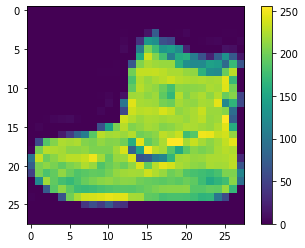

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

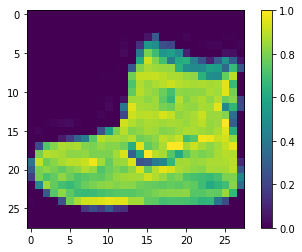

In [ ]:
# Pre-process. min-max scaling to 0-1. Msost popular on images

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

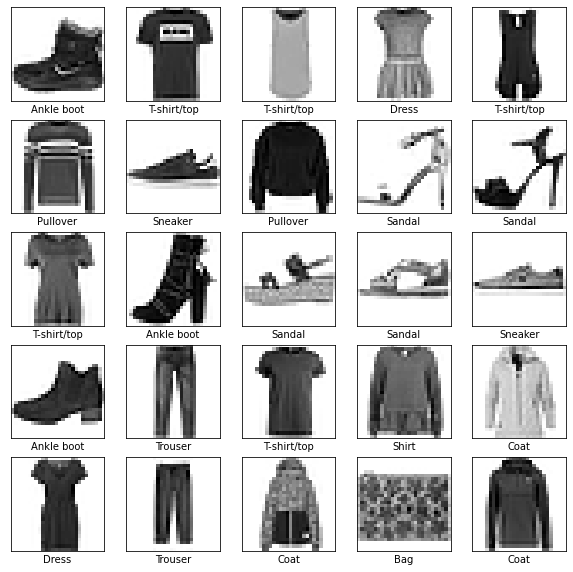

In [ ]:
# Lets see a few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
# Simple MLP

# Keras Sequential Model
tf.random.set_seed(100)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

model = None
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Alternative ways of writing the same: https://www.tensorflow.org/guide/keras/overview

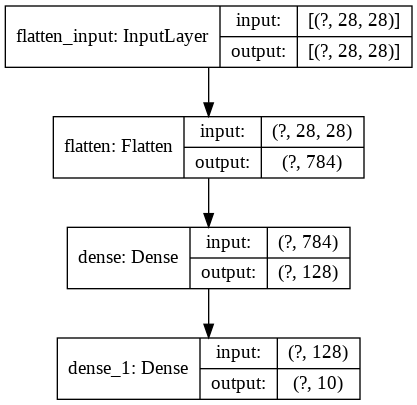

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

# 784*128 + 128 = 100480
# 128 * 10 + 10 = 1290

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Refer: https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Refer: https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work
# More options: https://www.tensorflow.org/guide/keras/overview

## Tensorboard

In [ ]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime

! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)


logs/20200428-133517


In [ ]:
%load_ext tensorboard
%tensorboard --logdir $logdir

This cell output is too large and can only be displayed while logged in.


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5006 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3794 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3397 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8893
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3420 - accuracy: 0.8788

Test accuracy: 0.8787999749183655


In [ ]:
# take-away: more epochs. [Checkpointing & model saving]
# Refer: https://www.tensorflow.org/tutorials/keras/save_and_load
! pip install -q pyyaml h5py


## Check-pointing

In [ ]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



# Tensorbaord
! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%tensorboard --logdir $logdir


tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Train the model with the new callback
tf.random.set_seed(100)
model = None
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, 
          train_labels,  
          epochs=20, # more epochs
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback, tensorboard_callback ])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

This cell output is too large and can only be displayed while logged in.


In [ ]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3646 - accuracy: 0.8868


[0.3646467626094818, 0.8867999911308289]

In [ ]:
# Confusion matrix
y_pred=model.predict_classes(test_images)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
import pandas as pd
pd.set_option('max_columns', None)

con_mat_df = pd.DataFrame(con_mat,
                     index = class_names, 
                     columns = class_names)
print(con_mat_df)

             T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  \
T-shirt/top          763        1        23     30     3       2    170   
Trouser                5      960         4     22     3       1      5   
Pullover              10        1       823     12    90       0     64   
Dress                  9        2         7    916    35       0     27   
Coat                   1        1        86     31   835       0     44   
Sandal                 0        0         0      1     0     955      0   
Shirt                 73        0        98     30    71       0    716   
Sneaker                0        0         0      0     0      11      0   
Bag                    1        0         3      7     1       1      6   
Ankle boot             0        0         0      0     0       7      1   

             Sneaker  Bag  Ankle boot  
T-shirt/top        0    8           0  
Trouser            0    0           0  
Pullover           0    0           0  
Dress         

In [ ]:
! ls training_1

checkpoint		     cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


In [ ]:
! cat training_1/checkpoint

model_checkpoint_path: "cp.ckpt"
all_model_checkpoint_paths: "cp.ckpt"


In [ ]:
def create_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model;
  

In [ ]:
model_ckpt2 = create_model()
model_ckpt2.load_weights(checkpoint_path)

model_ckpt2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3646 - accuracy: 0.8868


[0.3646467626094818, 0.8867999911308289]

In [ ]:
# continue training again
model_ckpt2.fit(train_images, 
          train_labels,  
          batch_size=64,
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])

Epoch 1/10
922/938 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9422
Epoch 00001: saving model to training_1/cp.ckpt
938/938 [==============================] - 3s 4ms/step - loss: 0.1549 - accuracy: 0.9423 - val_loss: 0.3491 - val_accuracy: 0.8891
Epoch 2/10
923/938 [============================>.] - ETA: 0s - loss: 0.1547 - accuracy: 0.9423
Epoch 00002: saving model to training_1/cp.ckpt
938/938 [==============================] - 3s 3ms/step - loss: 0.1548 - accuracy: 0.9423 - val_loss: 0.3578 - val_accuracy: 0.8910
Epoch 3/10
932/938 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9431
Epoch 00003: saving model to training_1/cp.ckpt
938/938 [==============================] - 3s 3ms/step - loss: 0.1524 - accuracy: 0.9431 - val_loss: 0.3516 - val_accuracy: 0.8949
Epoch 4/10
934/938 [============================>.] - ETA: 0s - loss: 0.1504 - accuracy: 0.9439
Epoch 00004: saving model to training_1/cp.ckpt
938/938 [======================

## Simple MLP: Functional API

In [ ]:
# Create Functional API based model
# Refer: https://www.tensorflow.org/guide/keras/functional
from tensorflow.keras import layers

tf.keras.backend.clear_session()  # For easy reset of notebook state.

def create_func_model():
  inputs = keras.Input(shape=(28,28))
  o1 = layers.Flatten()(inputs)
  o2 = layers.Dense(128, activation='relu')(o1)
  outputs = layers.Dense(10)(o2)

  model_func = keras.Model(inputs, outputs, name='model_func')

  
  model_func.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model_func


In [ ]:
model_func = create_func_model();
model_func.summary()

Model: "model_func"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


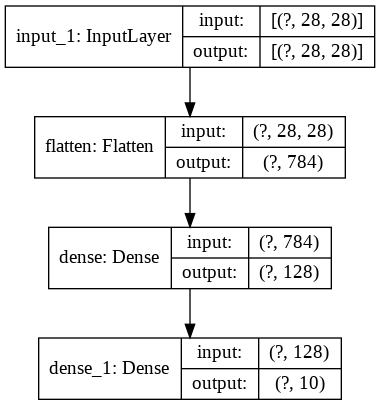

In [ ]:
plot_model(model_func, 'model_func.png', show_shapes=True)

## Simple Residual-CNN: Functional API

In [ ]:
# CNN with Residual-connections using Functional API
# A toy ResNet model
# Refer: https://www.tensorflow.org/guide/keras/functional

def toyResNet():
  inputs = keras.Input(shape=(32, 32, 3), name='img')
  x = layers.Conv2D(32, 3, activation='relu')(inputs)
  x = layers.Conv2D(64, 3, activation='relu')(x)
  block_1_output = layers.MaxPooling2D(3)(x)

  x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  block_2_output = layers.add([x, block_1_output])

  x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  block_3_output = layers.add([x, block_2_output])

  x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(10)(x)

  model = keras.Model(inputs, outputs, name='toy_resnet')
  return model

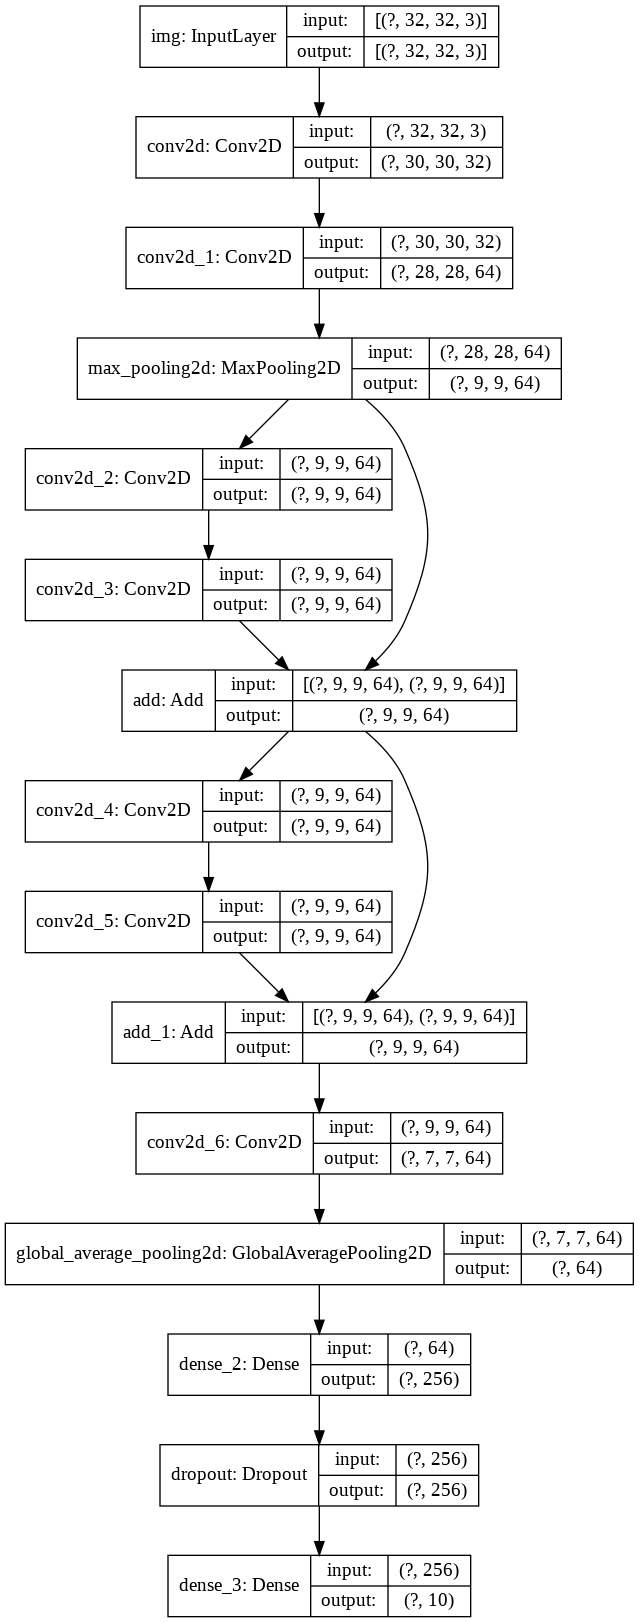

In [ ]:
model_t = toyResNet();
keras.utils.plot_model(model_t, 'mini_resnet.png', show_shapes=True)


In [ ]:
model_t.summary()

# CONV: 32 X (3X3X3) + 32 = 896
# CONV: 64 x (3X3X32) + 64 = 18496


Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# pre-process
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)

model_t.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model_t.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/10
625/625 [==============================] - 18s 28ms/step - loss: 1.3112 - acc: 0.5163 - val_loss: 1.1809 - val_acc: 0.5702
Epoch 2/10
625/625 [==============================] - 17s 28ms/step - loss: 1.0975 - acc: 0.6012 - val_loss: 0.9624 - val_acc: 0.6510
Epoch 3/10
625/625 [==============================] - 17s 27ms/step - loss: 0.9698 - acc: 0.6492 - val_loss: 0.9082 - val_acc: 0.6742
Epoch 4/10
625/625 [==============================] - 17s 28ms/step - loss: 0.8712 - acc: 0.6899 - val_loss: 0.8313 - val_acc: 0.7038
Epoch 5/10
625/625 [==============================] - 17s 28ms/step - loss: 0.8026 - acc: 0.7165 - val_loss: 0.7667 - val_acc: 0.7277
Epoch 6/10
625/625 [==============================] - 17s 28ms/step - loss: 0.7333 - acc: 0.7409 - val_loss: 0.7278 - val_acc: 0.7418
Epoch 7/10
625/625 [==============================] - 17s 28ms/step - loss: 0.6782 - acc: 0.7629 - val_loss: 0.7007 - val_acc: 0.7532
Epoch 8/10
625/625 [====

## Accessing model weights

In [ ]:
print(model_t.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fefb0d214a8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d50080>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d21898>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fefb0d50b70>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb1190748>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d1d2b0>, <tensorflow.python.keras.layers.merge.Add object at 0x7fefb0d21828>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d1d400>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d252e8>, <tensorflow.python.keras.layers.merge.Add object at 0x7fefb4189eb8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef54d4c470>, <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fefb744e5f8>, <tensorflow.python.keras.layers.core.Dense object

In [ ]:
print(model_t.layers[2])

In [ ]:
print(model_t.layers[2].filters)
#Refer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

64


In [ ]:
print(len(model_t.layers[2].get_weights()))

# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/layers/convolutional.py
# https://github.com/tensorflow/tensorflow/blob/69ccb409a0b2fe72ddc5a074f5d109216dc46435/tensorflow/python/keras/engine/base_layer.py#L97


2


In [ ]:
model_t.layers[2].get_weights()[0].shape
# Kernel-size:3X3X32
# Num-Kernels:64

(3, 3, 32, 64)

In [ ]:
model_t.layers[2].get_weights()[1].shape
# bias-terms for each kernel.

(64,)

In [ ]:
w = (model_t.layers[2].get_weights()[0]).reshape((-1,1))
print(w.shape)

(18432, 1)


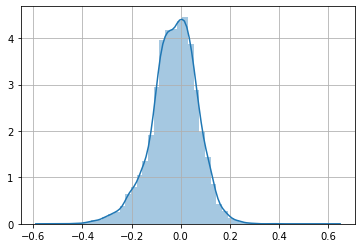

In [ ]:
import seaborn as sns
plt.grid()
sns.distplot(w,hist=True, kde=True)

## 